In [1]:
from specdal import Collection, Spectrum, read
from matplotlib import pyplot as plt

# Processing a Collection of spectra
 
SpecDAL provides Collection class for processing multiple spectrum files in conjunction and for grouping operations.

Manual way of loading files into Collection object:

In [2]:
import os
datadir = "/home/young/data/specdal/aidan_data2/ASD/"
c = Collection(name='myFirst')
for f in sorted(os.listdir(datadir))[1:11]:
    spectrum = Spectrum(filepath=os.path.join(datadir, f))
    c.append(spectrum)

We can access spectra by name:

In [3]:
print(type(c["ACPA_F_A_SU_20160617_00000"]))
print(c["ACPA_F_A_SU_20160617_00000"])

<class 'specdal.spectrum.Spectrum'>

name:		ACPA_F_A_SU_20160617_00000,
measure_type:	pct_reflect
measurements:	wave  |measurement
		------|-----------
		 350.0|1.030
		   ...|...
		2500.0|0.994
metadata:	file:/home/young/data/specdal/aidan_data2/ASD/ACPA_F_A_SU_20160617_00000.asd
		instrument_type:ASD
		integration_time:34
		measurement_type:REF_TYPE
		gps_time_tgt:570425344
		gps_time_ref:None
		wavelength_range:(350.0, 2500.0)



As a list:

In [4]:
print(type(c.spectra))
for s in c.spectra[0:2]:
    print(s)

<class 'list'>

name:		ACPA_F_A_SU_20160617_00000,
measure_type:	pct_reflect
measurements:	wave  |measurement
		------|-----------
		 350.0|1.030
		   ...|...
		2500.0|0.994
metadata:	file:/home/young/data/specdal/aidan_data2/ASD/ACPA_F_A_SU_20160617_00000.asd
		instrument_type:ASD
		integration_time:34
		measurement_type:REF_TYPE
		gps_time_tgt:570425344
		gps_time_ref:None
		wavelength_range:(350.0, 2500.0)


name:		ACPA_F_A_SU_20160617_00001,
measure_type:	pct_reflect
measurements:	wave  |measurement
		------|-----------
		 350.0|0.063
		   ...|...
		2500.0|0.062
metadata:	file:/home/young/data/specdal/aidan_data2/ASD/ACPA_F_A_SU_20160617_00001.asd
		instrument_type:ASD
		integration_time:34
		measurement_type:REF_TYPE
		gps_time_tgt:570425344
		gps_time_ref:None
		wavelength_range:(350.0, 2500.0)



As a DataFrame:

In [5]:
print(type(c.data))
c.data.head()

<class 'pandas.core.frame.DataFrame'>


,ACPA_F_A_SU_20160617_00000,ACPA_F_A_SU_20160617_00001,ACPA_F_A_SU_20160617_00002,ACPA_F_A_SU_20160617_00003,ACPA_F_A_SU_20160617_00004,ACPA_F_A_SU_20160617_00005,ACPA_F_A_SU_20160617_00006,ACPA_F_B_SU_20160617_00000,ACPA_F_B_SU_20160617_00001,ACPA_F_B_SU_20160617_00002
wavelength,,,,,,,,,,
350.0,1.029920,0.062520,0.054825,0.047980,0.030524,0.039145,0.046086,1.006596,0.045622,0.054009
351.0,1.012589,0.051453,0.047509,0.051738,0.026765,0.040643,0.045592,1.003693,0.048680,0.051740
352.0,1.002769,0.051112,0.050971,0.053821,0.026077,0.045721,0.044810,1.003884,0.051921,0.056053
353.0,1.015311,0.059031,0.059285,0.046132,0.029503,0.052729,0.045499,1.007190,0.048460,0.059304
354.0,1.010265,0.049564,0.040178,0.043550,0.038666,0.050580,0.036307,1.003131,0.034728,0.043735


Like the Spectrum class, Collection also provides wrappers around pandas.DataFrame methods. We can easily plot a collection as follows:

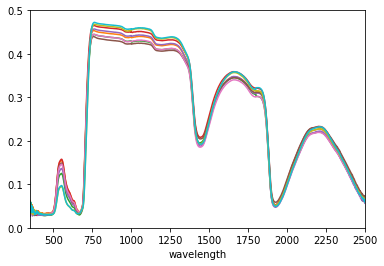

In [6]:
c.plot(legend=False, ylim=(0, 0.5))
plt.show()

If you look closely, there are jumps at wavelengths 1000, and 1800


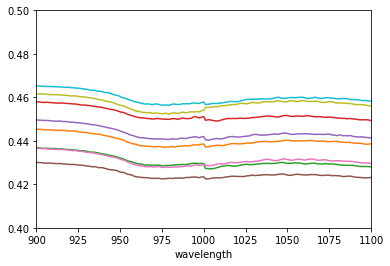

In [7]:
c.plot(legend=False, xlim=(900, 1100), ylim=(0.4, 0.5))
plt.show()

Spectrum objects provide jump_correct() method to deal with this. Collection class provides the same method which iterates through the spectrum objects and applies the jump correction. 

We could similarly apply other spectral transformations such as resampling and overlap stitching on the entire collection.

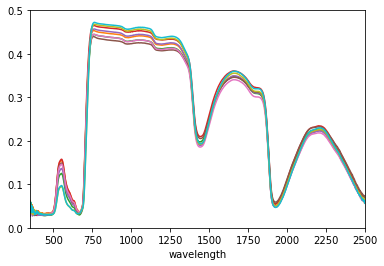

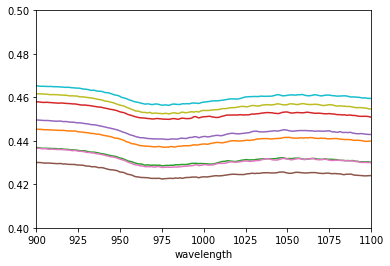

In [8]:
c.jump_correct(splices=[1000, 1800], reference=0)
c.plot(legend=False, ylim=(0, 0.5))
c.plot(legend=False, xlim=(900, 1100), ylim=(0.4, 0.5))
plt.show()

We can easily calculate aggregate functions (mean, median, min/max, std, etc.), which will return a Spectrum object:

<class 'specdal.spectrum.Spectrum'>


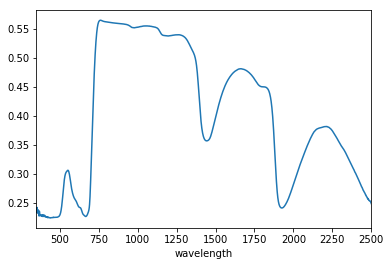

In [9]:
mean = c.mean()
print(type(mean))
mean.plot()
plt.show()

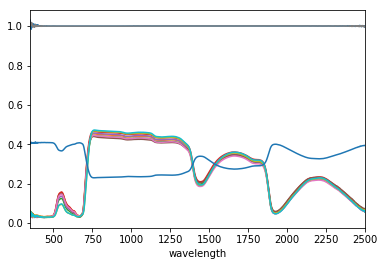

In [12]:
c.std(append=True) # append the spectrum to the original collection
c.plot(legend=False)
plt.show()